In [1]:
import matplotlib as plt
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Activation, Flatten, Dropout, Conv2D, BatchNormalization, MaxPooling2D, Lambda
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
from tensorflow.keras.regularizers import L1L2
dense_regularizer = L1L2(l2=0.0001)
from tensorflow.keras.metrics import categorical_crossentropy
from sklearn.metrics import confusion_matrix
from tensorflow.keras.datasets import cifar10 # importing the dataset from keras
from tensorflow.keras.utils import to_categorical
import os

In [2]:
"""This function loads CIFAR-10 dataset, normalized, and labels one-hot encoded"""
# loading the CIFAR-10 dataset, splitted between train and test sets
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
print("Training samples:", train_images.shape[0])
print("Testing samples:", test_images.shape[0])
print(f"Images shape: {train_images.shape[1:]}")
# converting image labels to binary class matrices
train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)
# convert to floats instead of int, so we can divide by 255
train_images = train_images.astype("float32")
test_images = test_images.astype("float32")
train_images /= 255
test_images /= 255

Training samples: 50000
Testing samples: 10000
Images shape: (32, 32, 3)


In [3]:
print(train_images.shape)
print(test_images.shape)
print(train_labels.shape)
print(test_labels.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 10)
(10000, 10)


In [4]:
BATCH_SIZE = 128

def Model_1(x=None):
    # we initialize the model
    model = Sequential()

    # Conv Block 1
    model.add(Conv2D(64, (5, 5), input_shape=(32, 32, 3),  padding='same', kernel_regularizer=dense_regularizer,kernel_initializer="he_normal"))
    model.add(BatchNormalization())
    model.add(Activation('elu'))
    model.add(Conv2D(64, (5, 5),   padding='same', kernel_regularizer=dense_regularizer,kernel_initializer="he_normal"))
    model.add(BatchNormalization())
    model.add(Activation('elu'))
    model.add(Conv2D(64, (5, 5),  padding='same', kernel_regularizer=dense_regularizer,kernel_initializer="he_normal"))
    model.add(BatchNormalization())
    model.add(Activation('elu'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    model.add(Dropout(0.5))

    # Conv Block 2
    model.add(Conv2D(128, (3, 3),  padding='same', kernel_regularizer=dense_regularizer,kernel_initializer="he_normal"))
    model.add(BatchNormalization())
    model.add(Activation('elu'))
    model.add(Conv2D(128, (3, 3),  padding='same', kernel_regularizer=dense_regularizer,kernel_initializer="he_normal"))
    model.add(BatchNormalization())
    model.add(Activation('elu'))
    model.add(Conv2D(128, (3, 3),  padding='same', kernel_regularizer=dense_regularizer,kernel_initializer="he_normal"))
    model.add(BatchNormalization())
    model.add(Activation('elu'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    model.add(Dropout(0.4))

    # Conv Block 3
    model.add(Conv2D(256, (3, 3),  padding='same', kernel_regularizer=dense_regularizer,kernel_initializer="he_normal"))
    model.add(BatchNormalization())
    model.add(Activation('elu'))
    model.add(Conv2D(256, (3, 3),  padding='same', kernel_regularizer=dense_regularizer,kernel_initializer="he_normal"))
    model.add(BatchNormalization())
    model.add(Activation('elu'))
    model.add(Conv2D(256, (3, 3),  padding='same', kernel_regularizer=dense_regularizer,kernel_initializer="he_normal"))
    model.add(BatchNormalization())
    model.add(Activation('elu'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    model.add(Dropout(0.3))

    # Conv Block 4
    model.add(Conv2D(512, (2, 2),  padding='same', kernel_regularizer=dense_regularizer,kernel_initializer="he_normal"))
    model.add(BatchNormalization())
    model.add(Activation('elu'))
    model.add(Conv2D(512, (2, 2),  padding='same', kernel_regularizer=dense_regularizer,kernel_initializer="he_normal"))
    model.add(BatchNormalization())
    model.add(Activation('elu'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    model.add(Dropout(0.2))
    
    model.add(Conv2D(512, (2, 2),  padding='valid', kernel_regularizer=dense_regularizer,kernel_initializer="he_normal"))
    model.add(BatchNormalization())
    model.add(Activation('elu'))

    # FC layers
    model.add(Flatten())
    model.add(Dense(10, activation='softmax', kernel_regularizer=dense_regularizer,kernel_initializer="he_normal"))

    return model

model = Model_1()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 64)        4864      
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 64)        256       
_________________________________________________________________
activation (Activation)      (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 64)        102464    
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 64)        256       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 64)        1

In [5]:
model.compile(Adam(lr=0.001),loss="categorical_crossentropy",metrics=["accuracy"])

In [6]:
import tensorflow.keras
callbacks_list = [
tensorflow.keras.callbacks.EarlyStopping(
monitor='val_accuracy', min_delta=0.0001, 
patience=20, verbose=1, mode='auto',
baseline=None, restore_best_weights=True),
tensorflow.keras.callbacks.ReduceLROnPlateau(
monitor='val_accuracy',
factor=0.5,
patience=10,
verbose=1,
mode='auto'),
tensorflow.keras.callbacks.ModelCheckpoint(
filepath='./my_model.h5',
monitor='val_accuracy',
save_best_only=True,
)
]

In [7]:
history =  model.fit(train_images, train_labels,
            batch_size=BATCH_SIZE,
            epochs=200, verbose=1,
            validation_data=(test_images,test_labels),
            callbacks=callbacks_list,
                    shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/200
50000/50000 [==============================] - 48s 953us/sample - loss: 2.0435 - accuracy: 0.4759 - val_loss: 2.0971 - val_accuracy: 0.5300
Epoch 2/200
50000/50000 [==============================] - 43s 859us/sample - loss: 1.5545 - accuracy: 0.6403 - val_loss: 1.8788 - val_accuracy: 0.5771
Epoch 3/200
50000/50000 [==============================] - 42s 845us/sample - loss: 1.3300 - accuracy: 0.7035 - val_loss: 1.3131 - val_accuracy: 0.7024
Epoch 4/200
50000/50000 [==============================] - 43s 858us/sample - loss: 1.1924 - accuracy: 0.7351 - val_loss: 1.1291 - val_accuracy: 0.7524
Epoch 5/200
50000/50000 [==============================] - 42s 842us/sample - loss: 1.0968 - accuracy: 0.7556 - val_loss: 1.1524 - val_accuracy: 0.7358
Epoch 6/200
50000/50000 [==============================] - 43s 857us/sample - loss: 1.0294 - accuracy: 0.7668 - val_loss: 0.9975 - val_accuracy: 0.7796
Epoch 7/200
50000/50000 [=============

Epoch 53/200
49920/50000 [============================>.] - ETA: 0s - loss: 0.3667 - accuracy: 0.9527
Epoch 00053: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
50000/50000 [==============================] - 42s 850us/sample - loss: 0.3669 - accuracy: 0.9526 - val_loss: 0.7303 - val_accuracy: 0.8569
Epoch 54/200
50000/50000 [==============================] - 43s 867us/sample - loss: 0.3071 - accuracy: 0.9713 - val_loss: 0.6018 - val_accuracy: 0.8900
Epoch 55/200
50000/50000 [==============================] - 43s 861us/sample - loss: 0.2804 - accuracy: 0.9785 - val_loss: 0.6228 - val_accuracy: 0.8903
Epoch 56/200
50000/50000 [==============================] - 42s 848us/sample - loss: 0.2697 - accuracy: 0.9799 - val_loss: 0.6655 - val_accuracy: 0.8789
Epoch 57/200
50000/50000 [==============================] - 43s 854us/sample - loss: 0.2671 - accuracy: 0.9782 - val_loss: 0.6515 - val_accuracy: 0.8861
Epoch 58/200
50000/50000 [==============================] - 43s 85

50000/50000 [==============================] - 43s 854us/sample - loss: 0.1209 - accuracy: 0.9973 - val_loss: 0.5688 - val_accuracy: 0.9026
Epoch 102/200
50000/50000 [==============================] - 42s 849us/sample - loss: 0.1196 - accuracy: 0.9978 - val_loss: 0.5671 - val_accuracy: 0.9029
Epoch 103/200
50000/50000 [==============================] - 42s 849us/sample - loss: 0.1190 - accuracy: 0.9975 - val_loss: 0.5670 - val_accuracy: 0.9041
Epoch 104/200
50000/50000 [==============================] - 43s 863us/sample - loss: 0.1175 - accuracy: 0.9979 - val_loss: 0.5551 - val_accuracy: 0.9046
Epoch 105/200
50000/50000 [==============================] - 43s 866us/sample - loss: 0.1166 - accuracy: 0.9980 - val_loss: 0.5585 - val_accuracy: 0.9067
Epoch 106/200
50000/50000 [==============================] - 42s 847us/sample - loss: 0.1165 - accuracy: 0.9978 - val_loss: 0.5625 - val_accuracy: 0.9047
Epoch 107/200
50000/50000 [==============================] - 43s 853us/sample - loss: 0.11

50000/50000 [==============================] - 43s 851us/sample - loss: 0.0946 - accuracy: 0.9992 - val_loss: 0.5384 - val_accuracy: 0.9081
Epoch 151/200
50000/50000 [==============================] - 43s 850us/sample - loss: 0.0945 - accuracy: 0.9991 - val_loss: 0.5395 - val_accuracy: 0.9085
Epoch 152/200
50000/50000 [==============================] - 43s 851us/sample - loss: 0.0940 - accuracy: 0.9994 - val_loss: 0.5398 - val_accuracy: 0.9079
Epoch 153/200
50000/50000 [==============================] - 43s 851us/sample - loss: 0.0947 - accuracy: 0.9989 - val_loss: 0.5427 - val_accuracy: 0.9073
Epoch 154/200
50000/50000 [==============================] - 43s 851us/sample - loss: 0.0939 - accuracy: 0.9994 - val_loss: 0.5385 - val_accuracy: 0.9082
Epoch 155/200
49920/50000 [============================>.] - ETA: 0s - loss: 0.0942 - accuracy: 0.9992 ETA: 0s - loss: 0.0942 - Restoring model weights from the end of the best epoch.

Epoch 00155: ReduceLROnPlateau reducing learning rate to 1.

In [8]:
from matplotlib import pyplot as plt

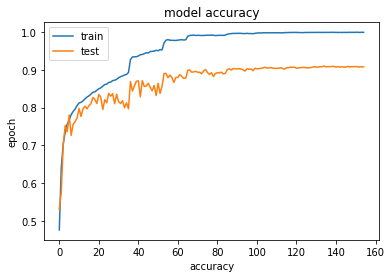

In [9]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.xlabel('accuracy')
plt.ylabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

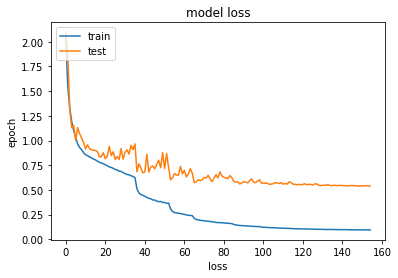

In [10]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.xlabel('loss')
plt.ylabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [11]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=0)
print('test_acc:', test_acc)
print('test_loss:', test_loss)

test_acc: 0.9097
test_loss: 0.5425402359008789


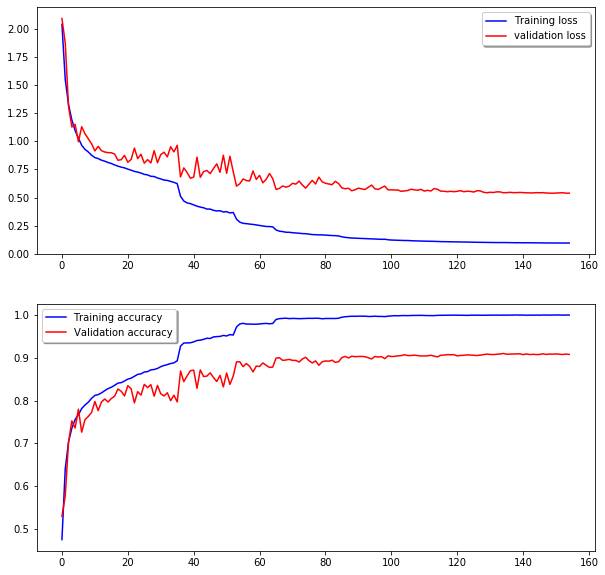

In [12]:
fig, ax = plt.subplots(2,1, figsize=(10, 10))
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

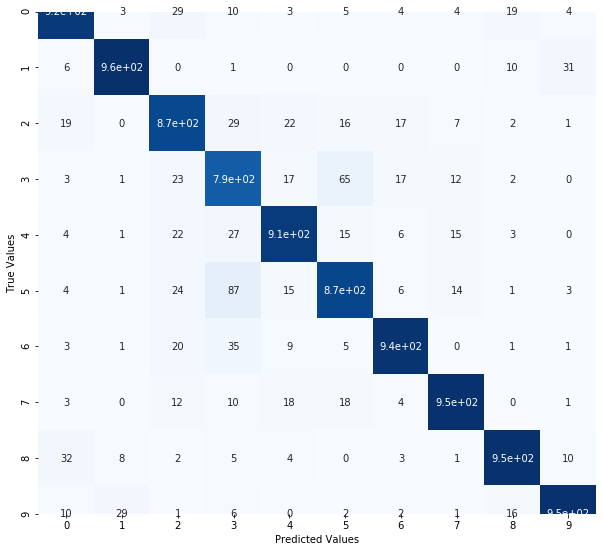

In [13]:
import numpy as np
import seaborn as sns

fig = plt.figure(figsize=(10, 10)) # Set Figure

y_pred = model.predict(test_images) # Predict encoded label as 2 => [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

Y_pred = np.argmax(y_pred, 1) # Decode Predicted labels
Y_test = np.argmax(test_labels, 1) # Decode labels

mat = confusion_matrix(Y_test, Y_pred) # Confusion matrix

# Plot Confusion matrix
sns.heatmap(mat.T, square=True, annot=True, cbar=False, cmap=plt.cm.Blues)
plt.xlabel('Predicted Values')
plt.ylabel('True Values');
plt.show();

In [14]:
# evaluation
loss, accuracy = model.evaluate(test_images,test_labels,verbose=0)
print("Test accuracy:", accuracy*100, "%")

Test accuracy: 90.96999764442444 %


In [16]:
model.save('./Models/Model-1_CIFAR_10_90_97.h5')